# Ejercicio k-Nearest Neighbor

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Leemos nuestro archivo de entrada

In [2]:
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


## Rápidas visualizaciones

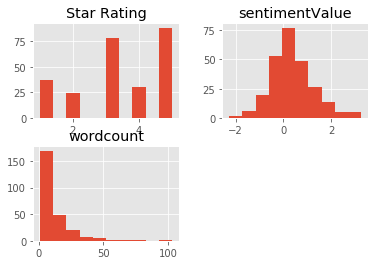

In [4]:
dataframe.hist()
plt.show()

In [5]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


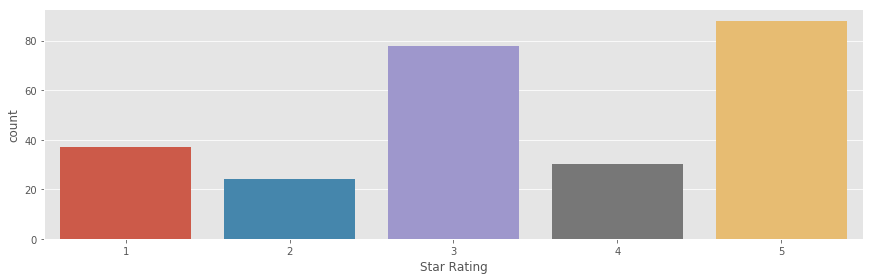

In [6]:
sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)

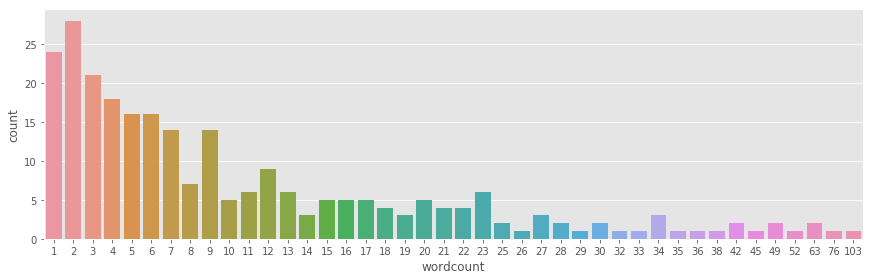

In [7]:
sb.factorplot('wordcount',data=dataframe,kind="count", aspect=3)

## Preparamos el dataset

In [3]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

In [4]:
print(len(X))

257


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
print("Tamaño del train:",len(X_train))
print("Tamaño sale test", len(X_test))

Tamaño del train: 179
Tamaño sale test 78


In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creamos el Modelo

## KNN

In [7]:
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.86


In [9]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  0  1  0  0]
 [ 0  2  0  0  0]
 [ 1  0 21  1  1]
 [ 0  0  2  8  1]
 [ 0  0  3  1 26]]
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00         2
           3       0.78      0.88      0.82        24
           4       0.80      0.73      0.76        11
           5       0.93      0.87      0.90        30

    accuracy                           0.86        78
   macro avg       0.88      0.88      0.88        78
weighted avg       0.86      0.86      0.86        78



## ARBOLES

In [21]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
print('Accuracy of Tree classifier on training set: {:.2f}'
     .format(tree_clf.score(X_train, y_train)))
print('Accuracy of Tree classifier on test set: {:.2f}'
     .format(tree_clf.score(X_test, y_test)))

Accuracy of Tree classifier on training set: 0.95
Accuracy of Tree classifier on test set: 0.88


[Text(0.5, 0.8333333333333334, 'sentimentValue <= 0.501\ngini = 0.757\nsamples = 179\nvalue = [26, 22, 54, 19, 58]\nclass = 5'),
 Text(0.25, 0.5, 'sentimentValue <= 0.379\ngini = 0.629\nsamples = 103\nvalue = [26, 21, 53, 3, 0]\nclass = 3'),
 Text(0.125, 0.16666666666666666, 'gini = 0.361\nsamples = 32\nvalue = [25, 5, 2, 0, 0]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.431\nsamples = 71\nvalue = [1, 16, 51, 3, 0]\nclass = 3'),
 Text(0.75, 0.5, 'wordcount <= 0.12\ngini = 0.373\nsamples = 76\nvalue = [0, 1, 1, 16, 58]\nclass = 5'),
 Text(0.625, 0.16666666666666666, 'gini = 0.034\nsamples = 58\nvalue = [0, 0, 1, 0, 57]\nclass = 5'),
 Text(0.875, 0.16666666666666666, 'gini = 0.204\nsamples = 18\nvalue = [0, 1, 0, 16, 1]\nclass = 4')]

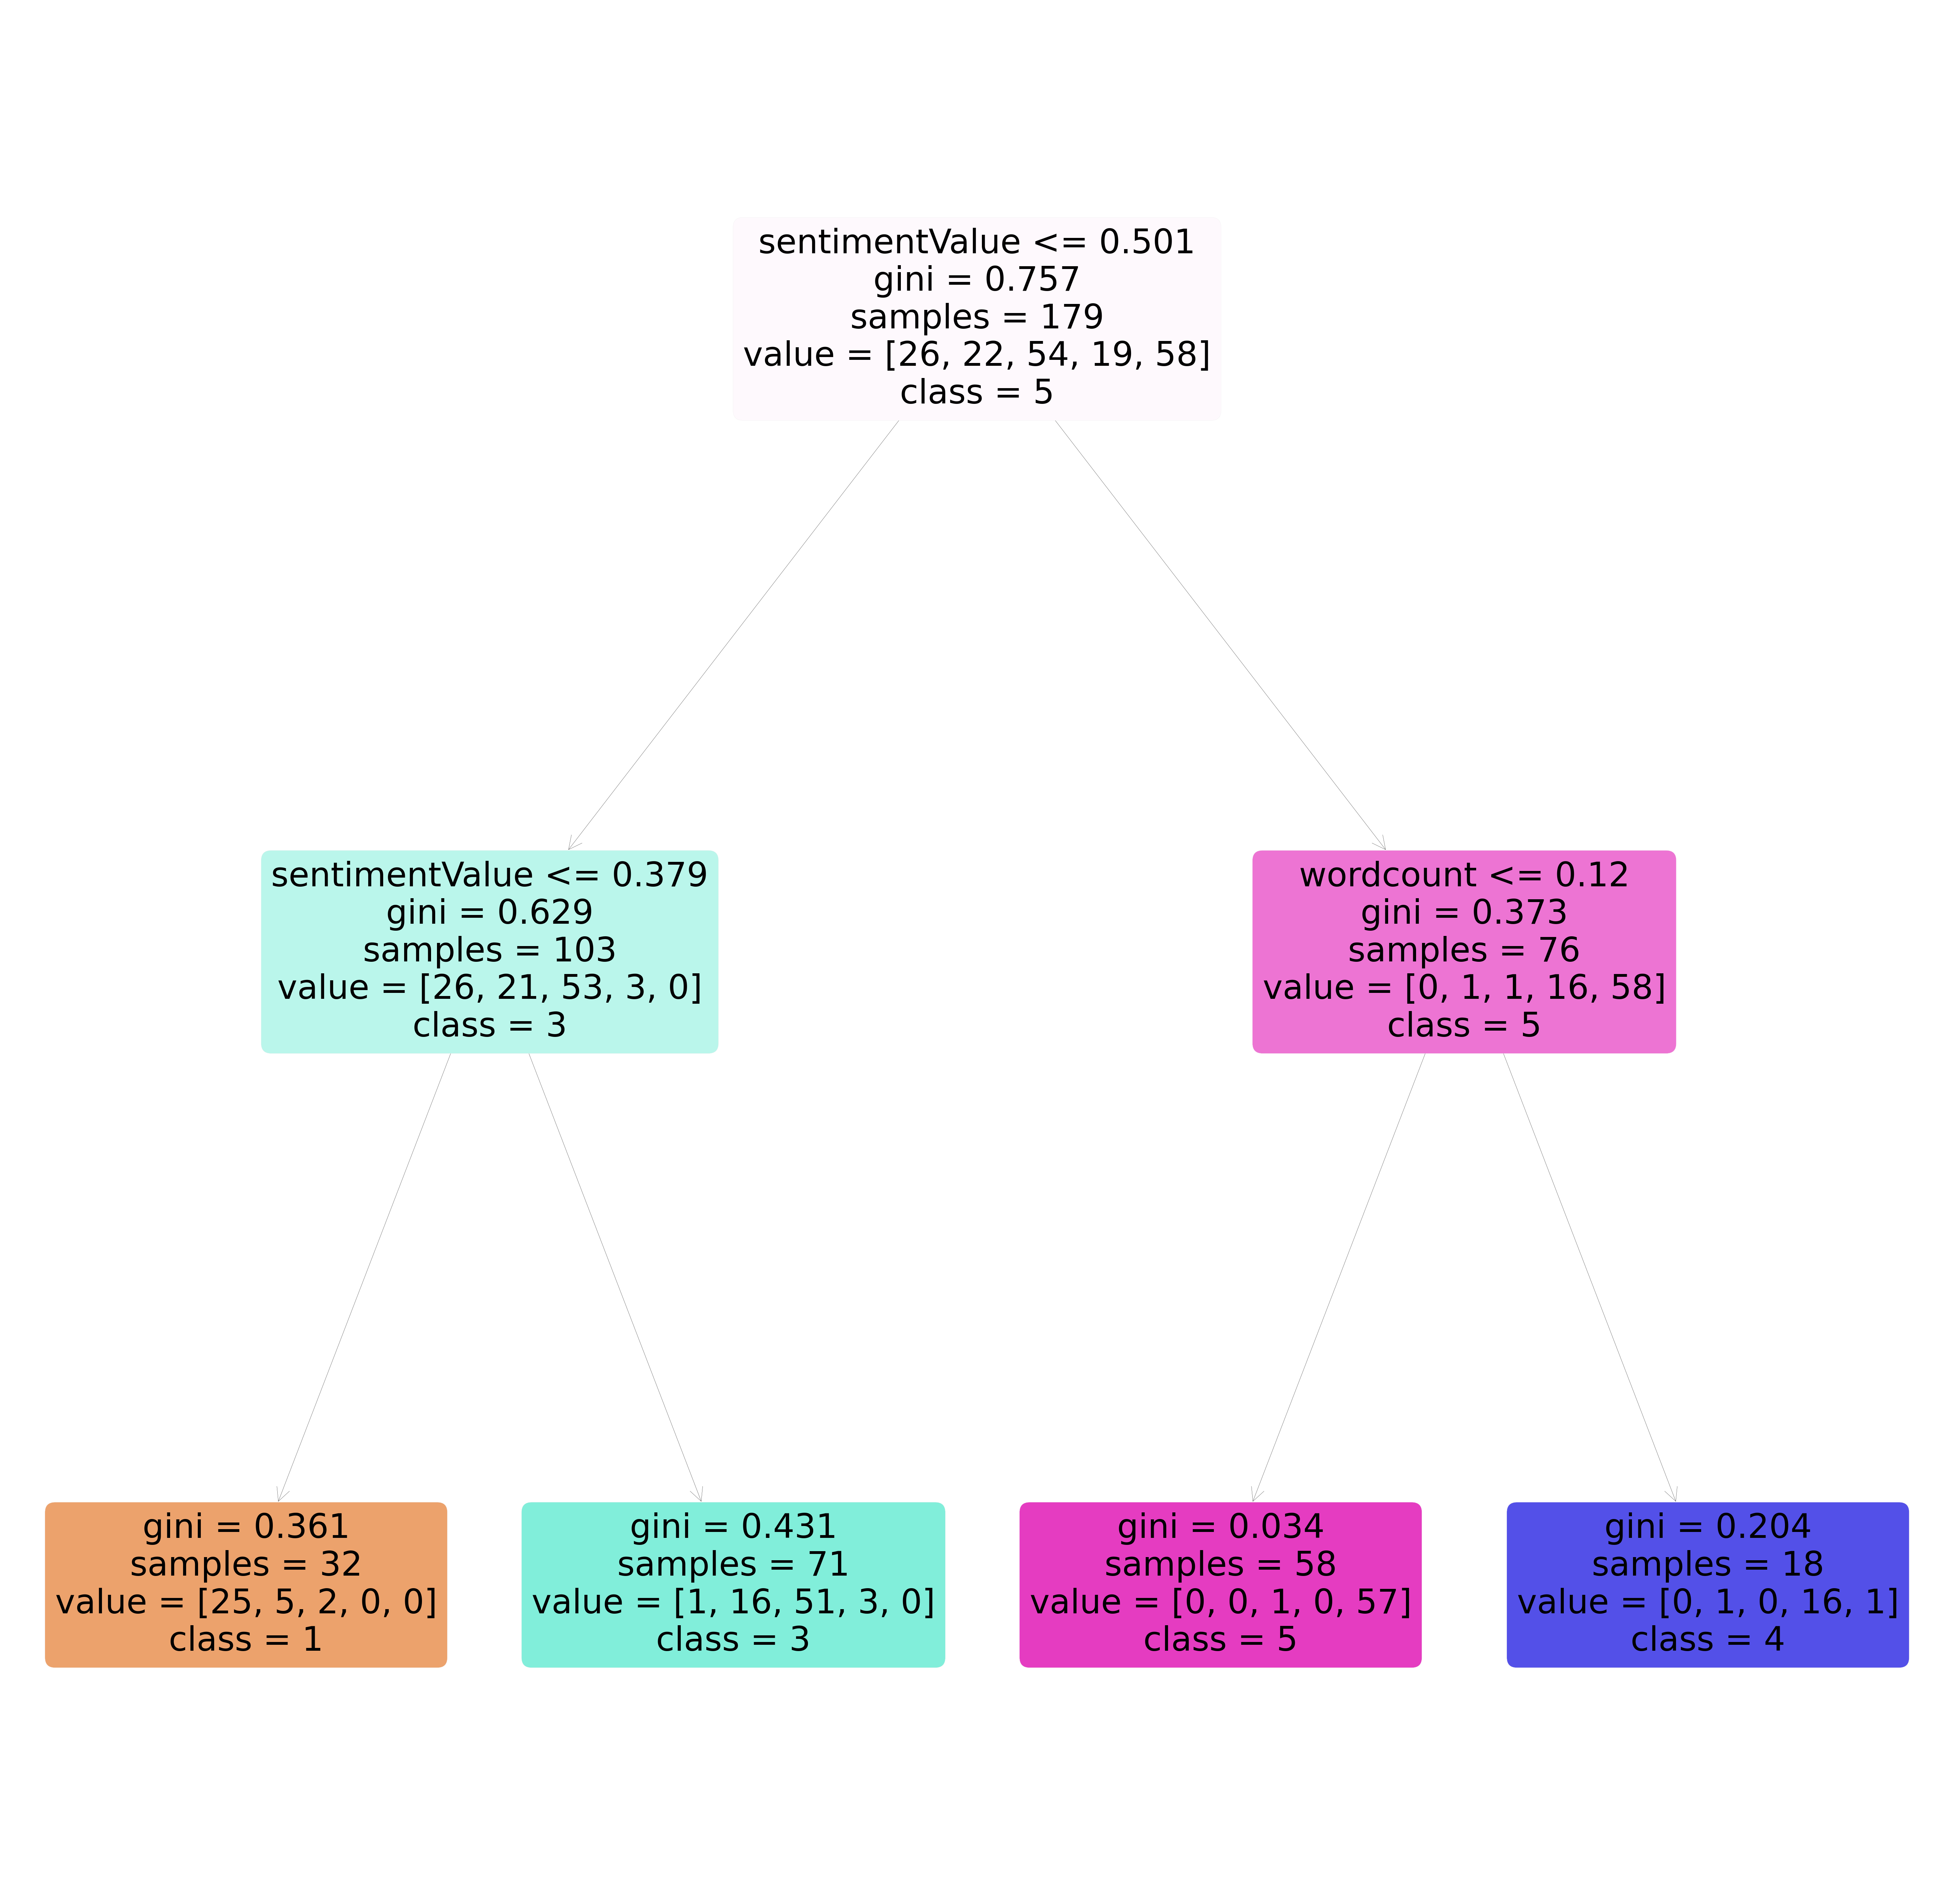

In [15]:
# Visualizando árbol de decisión
plt.figure(figsize=(100,100))
tree.plot_tree(
    tree_clf,
    feature_names=['wordcount','sentimentValue'],
    class_names=['1','2','3','4','5'],
    rounded=True,
    filled=True
)

In [22]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  0  1  0  0]
 [ 0  2  0  0  0]
 [ 1  0 21  1  1]
 [ 0  0  2  8  1]
 [ 0  0  3  1 26]]
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00         2
           3       0.78      0.88      0.82        24
           4       0.80      0.73      0.76        11
           5       0.93      0.87      0.90        30

    accuracy                           0.86        78
   macro avg       0.88      0.88      0.88        78
weighted avg       0.86      0.86      0.86        78



# Gráfica de la Clasificación Obtenida

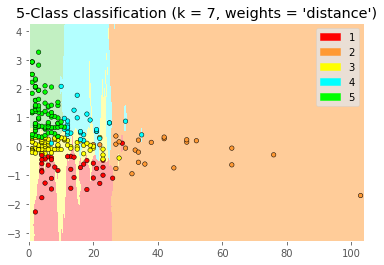

In [11]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

## Cómo obtener el mejor valor de k

([<matplotlib.axis.XTick at 0x1a46946cf8>,
 <a list of 5 Text xticklabel objects>)

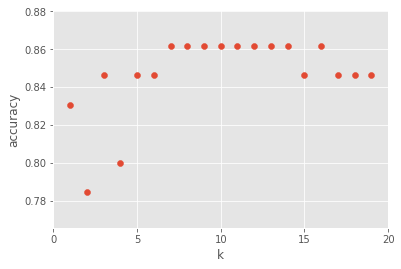

In [12]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# Predicciones

In [13]:
print(clf.predict([[5, 1.0]]))


[5]


In [14]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]
